In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Load the dataset
data = pd.read_csv('bitcoin_3_years_data.csv')

In [29]:
# Display the first few rows of the dataset
data.head()

,timestamp,timestamp_unix,open,high,low,close,volume
0,2021-12-20,1.639958e+09,46681.24,47537.57,45558.85,46914.16,35848.50609
1,2021-12-21,1.640045e+09,46914.17,49328.96,46630.00,48889.88,37713.92924
2,2021-12-22,1.640131e+09,48887.59,49576.13,48421.87,48588.16,27004.20220
3,2021-12-23,1.640218e+09,48588.17,51375.00,47920.42,50838.81,35192.54046
4,2021-12-24,1.640304e+09,50838.82,51810.00,50384.43,50820.00,31684.84269


In [30]:
# Checking for missing values
data.isnull().sum()

timestamp         0
timestamp_unix    0
open              0
high              0
low               0
close             0
volume            0
dtype: int64

In [31]:
# basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       1096 non-null   object 
 1   timestamp_unix  1096 non-null   float64
 2   open            1096 non-null   float64
 3   high            1096 non-null   float64
 4   low             1096 non-null   float64
 5   close           1096 non-null   float64
 6   volume          1096 non-null   float64
dtypes: float64(6), object(1)
memory usage: 60.1+ KB


In [34]:
# Data overview
data.describe()

,timestamp_unix,open,high,low,close,volume
count,1.096000e+03,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,1.687262e+09,40461.779699,41305.753047,39628.216250,40508.385411,94051.177022
std,2.734839e+07,19869.922422,20322.131161,19464.592605,19944.268223,112783.657880
min,1.639958e+09,15781.290000,16315.000000,15476.000000,15781.290000,7308.955420
25%,1.663610e+09,24660.820000,25250.000000,24181.512500,24660.795000,27971.409075
50%,1.687262e+09,35235.275000,35936.495000,34385.140000,35235.270000,43911.762480
75%,1.710914e+09,57990.675000,59464.285000,56806.210000,58070.580000,104409.948375
max,1.734566e+09,106133.740000,108353.000000,105321.490000,106133.740000,760705.362783


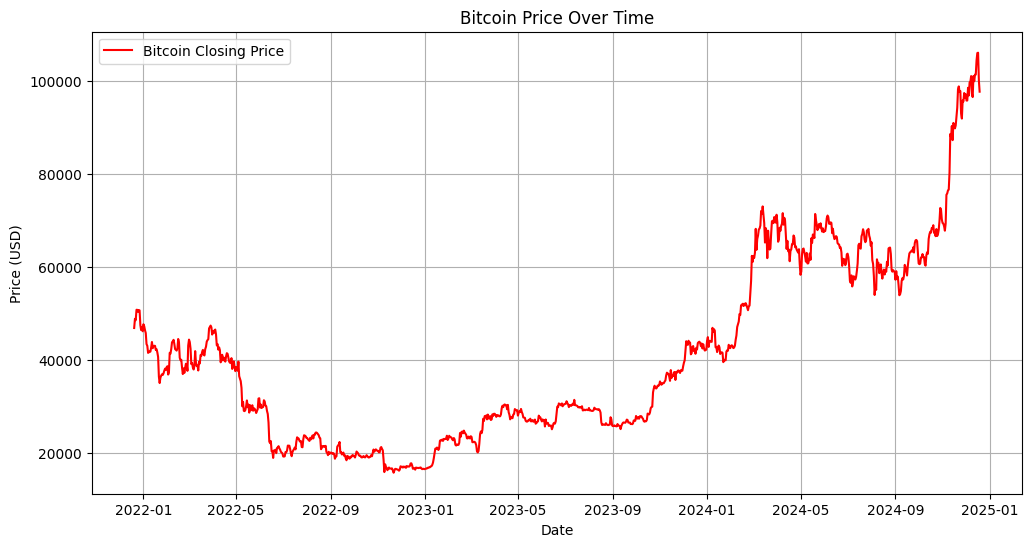

In [47]:
# Historical price trend
plt.figure(figsize=(12,6))

plt.plot(data['close'],color='red', label='Bitcoin Closing Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.legend()
plt.grid(True)
plt.show()

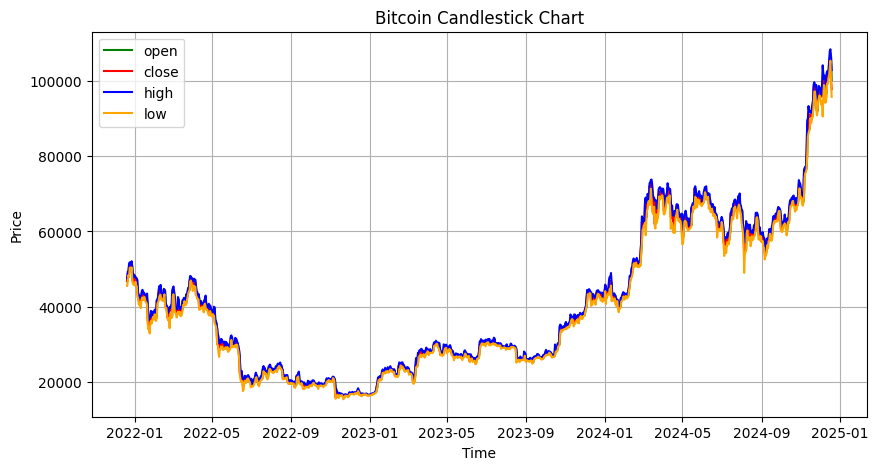

In [48]:
# Candlestick Chart
plt.figure(figsize=(10, 5))

plt.plot(data.index, data['open'], color='green', label='open')
plt.plot(data.index, data['close'], color='red', label='close')
plt.plot(data.index, data['high'], color='blue', label='high')
plt.plot(data.index, data['low'], color='orange', label='low')

plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price')

plt.legend()
plt.grid(True)
plt.show()

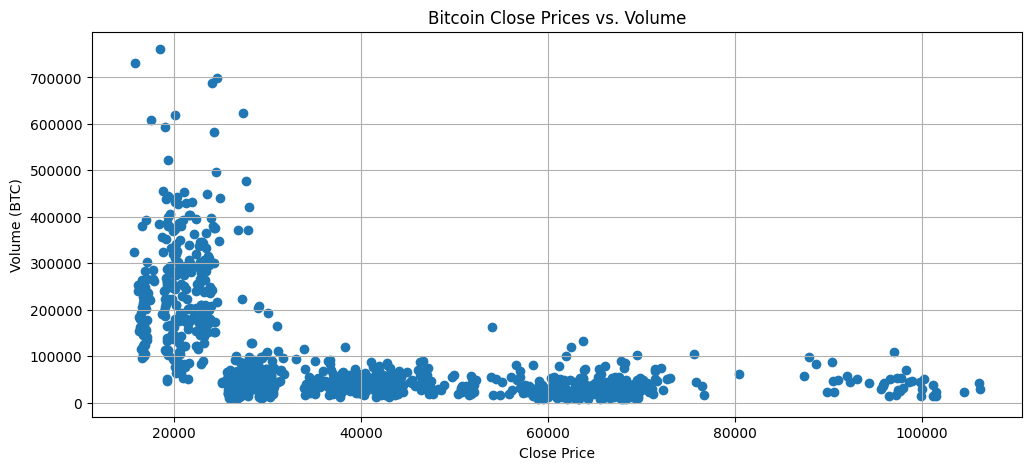

In [51]:
# Bitcoin close prices and volume
plt.figure(figsize=(12, 5))
plt.scatter(data['close'], data['volume'])
plt.title('Bitcoin Close Prices vs. Volume')
plt.xlabel('Close Price')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

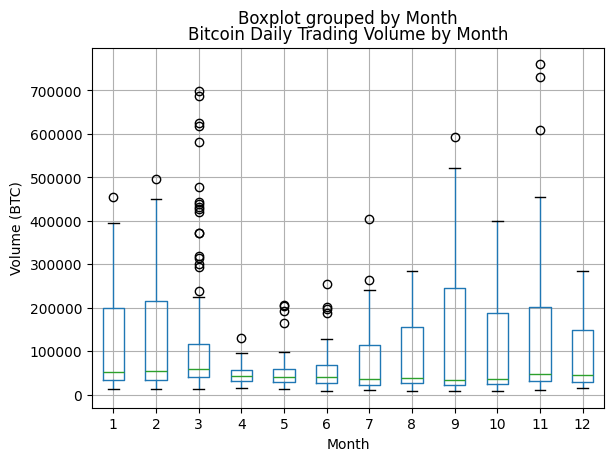

In [54]:
# Bitcoin daily trading volume by month
data['Month'] = data.index.month
plt.figure(figsize=(10, 5))
data.boxplot(column='volume', by='Month')
plt.title('Bitcoin Daily Trading Volume by Month')
plt.xlabel('Month')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

correlation matrix：
            open     close      high       low    volume
open    1.000000  0.997985  0.998970  0.998777 -0.494052
close   0.997985  1.000000  0.999219  0.999012 -0.492960
high    0.998970  0.999219  1.000000  0.998421 -0.487281
low     0.998777  0.999012  0.998421  1.000000 -0.500447
volume -0.494052 -0.492960 -0.487281 -0.500447  1.000000


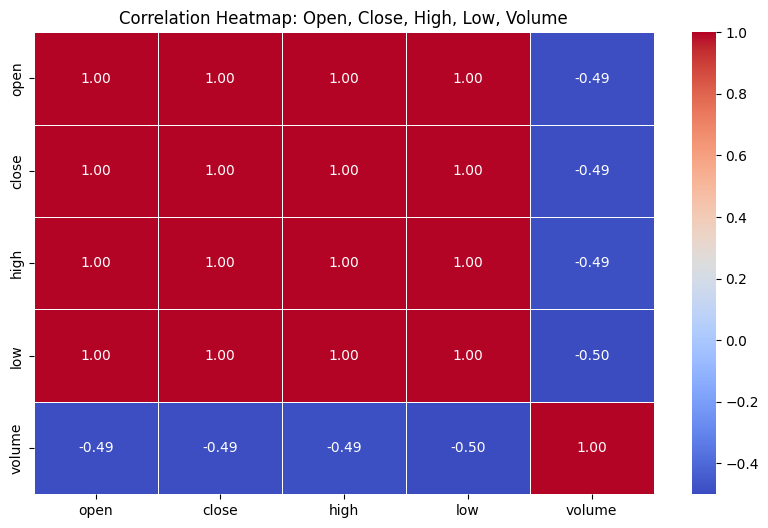

In [60]:
# Correlation matrix
correlation = data[['open', 'close', 'high', 'low', 'volume']].corr()

print("correlation matrix：")
print(correlation)

# Visual correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Open, Close, High, Low, Volume')
plt.show()

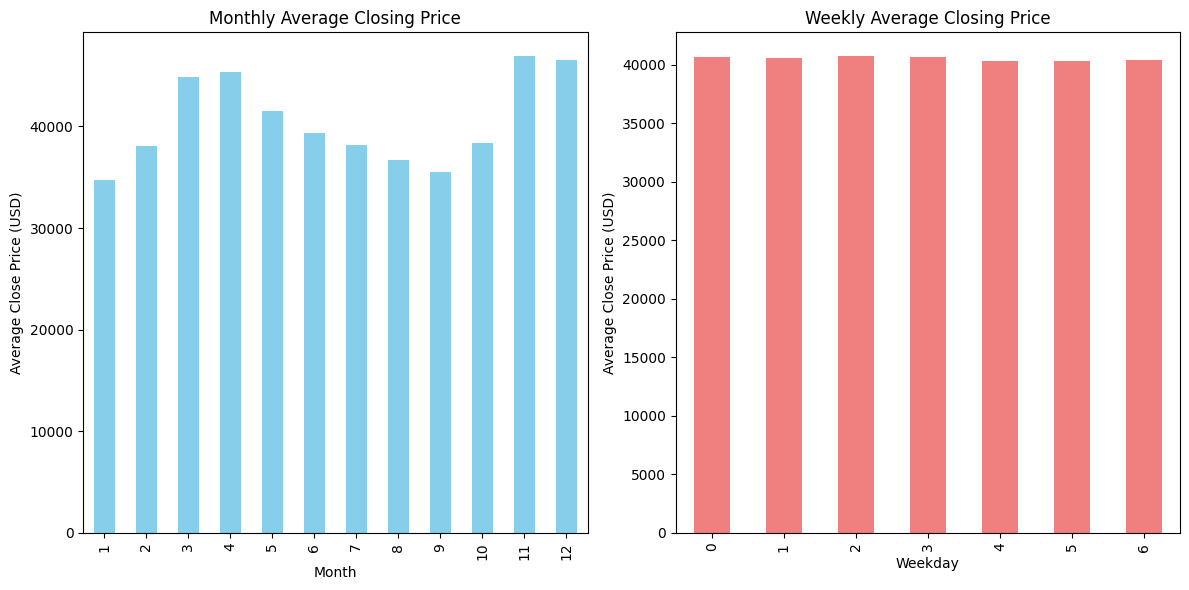

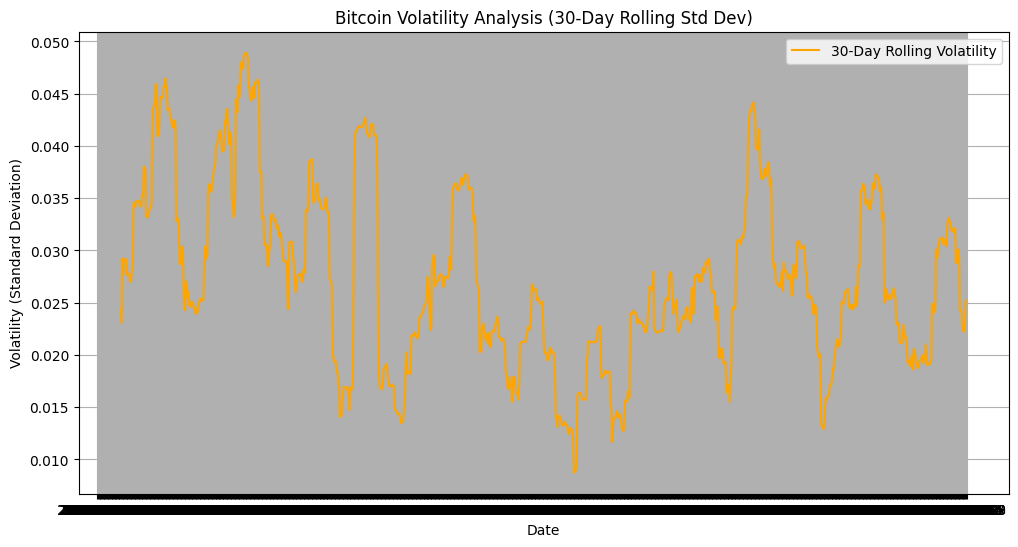

In [63]:
# Monthly and weekly price fluctuations (average)
data['Month'] = data['timestamp'].apply(lambda x: pd.to_datetime(x).month)
data['Weekday'] = data['timestamp'].apply(lambda x: pd.to_datetime(x).weekday())

# Monthly average price
monthly_avg = data.groupby('Month')['close'].mean()

# Weekly average price
weekly_avg = data.groupby('Weekday')['close'].mean()

# Visualize monthly and weekly trends
plt.figure(figsize=(12, 6))

# Monthly trend chart
plt.subplot(1, 2, 1)
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Monthly Average Closing Price')
plt.xlabel('Month')
plt.ylabel('Average Close Price (USD)')

# Weekly trend chart
plt.subplot(1, 2, 2)
weekly_avg.plot(kind='bar', color='lightcoral')
plt.title('Weekly Average Closing Price')
plt.xlabel('Weekday')
plt.ylabel('Average Close Price (USD)')

plt.tight_layout()
plt.show()

# Volatility analysis
# Returns -- Percentage change in price
data['Returns'] = data['close'].pct_change()  
# 30-day rolling standard deviation as volatility
volatility = data['Returns'].rolling(window=30).std()  

# Visual volatility
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], volatility, label='30-Day Rolling Volatility', color='orange')
plt.title('Bitcoin Volatility Analysis (30-Day Rolling Std Dev)')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()
plt.grid(True)
plt.show()